## Analzing the neighbourhood in Chennai India to come up with a location for starting a restaurant successfully.


# Introduction:
Chennai is one of the prominent cities of south India. Chennai is a an IT hub and manufacturing hub where 
workers coming from across India and world. Chennai is India's sixth-most populous city and the fourth-most populous urban agglomeration, according to the 2011 Indian census. The city is contiguous with the Chennai district, which, along with the surrounding suburbs, forms the Chennai Metropolitan Region, the world's 36th-largest urban area by population. Chennai, the historic and de facto gateway to South India, is one of India's most popular tourist destinations.

## Data Collection:
The data for this project was gathered from a variety of sources. The following is a list of the data needed for this project.

### Neighbourhood Data:
 The data for Chennai's neighbourhoods was taken from "https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai". The read html() method is used to read the data into a pandas data frame. The main reason for this is that the Wikipedia page contains a complete and detailed table of data that can be simply scraped with pandas' read html() method.

## Latitude and longitude coordinates:

The geographical coordinates for Chennai data were collected using Python's GeoPy package. This information is needed to draw a map of Chennai in Python using the Folium package. The python geocoder library was used to acquire latitude and longitude data for several Chennai neighbourhoods. All of Chennai neighbourhoods' coordinates are utilised to check the accuracy of Wikipedia coordinates and replace them in our data frame if the absolute difference is greater than 0.001. These coordinates are then used to plot data in Python using the Folium package.

## Venue Data:
The Foursquare API was used to obtain the venue information. This data offers venue recommendations for all Mumbai neighbourhoods and is used to research the most popular venues in each.

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


Retrieving data from wikipedia and reading it into dataframe

In [2]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table')
print(table.prettify())

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation">
 <tbody>
  <tr>
   <td class="mbox-image">
    <div style="width:52px">
     <a class="image" href="/wiki/File:Question_book-new.svg">
      <img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/>
     </a>
    </div>
   </td>
   <td class="mbox-text">
    <div class="mbox-text-span">
     This article
     <b>
      needs additional citations for
      <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">
       verification
      </a>
     </b>
     .
     <span class="hide-when-compact"

In [4]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai')[1]
df.head(25)

,Area,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.98800,80.20470
1,Adyar,South and East Chennai,13.00120,80.25650
2,Alandur,South and East Chennai,12.99750,80.20060
3,Alapakkam,West Chennai,13.04900,80.16730
4,Alwarthirunagar,West Chennai,13.04260,80.18400
5,Ambattur,West Chennai,13.11430,80.15480
6,Aminjikarai,West Chennai,13.06980,80.22450
7,Anna Nagar,West Chennai,13.08500,80.21010
8,Annanur,West Chennai,13.11840,80.12460
9,Arumbakkam,West Chennai,13.07240,80.21020


## Data wrangling

In [5]:
#data Wrangling
df['Area'].value_counts()

Ennore           2
Red Hills        2
Minjur           2
Surapet          1
Guindy           1
                ..
Muthukadu        1
Kallikuppam      1
Kovilambakkam    1
Pallikaranai     1
Karapakkam       1
Name: Area, Length: 173, dtype: int64

In [6]:
df['Location'].value_counts()

North Chennai                           57
South and East Chennai                  48
West Chennai                            45
Northern Suburbs of Chennai              7
Western Suburbs of Chennai               6
Suburbs along ECR and OMR of Chennai     6
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Name: Location, dtype: int64

In [62]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Area,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9919,80.206
1,Adyar,South and East Chennai,13.003,80.2519
2,Alandur,South and East Chennai,13.0001,80.2006
3,Alapakkam,West Chennai,13.0461,80.165
4,Alwarthirunagar,West Chennai,13.0506,80.184
5,Ambattur,West Chennai,13.1188,80.1548
6,Aminjikarai,West Chennai,13.0714,80.2226
7,Anna Nagar,West Chennai,13.0836,80.2101
8,Annanur,West Chennai,13.1121,80.129
9,Arumbakkam,West Chennai,13.0724,80.2102


In [63]:
df['Location'].value_counts()


North Chennai                           57
South and East Chennai                  48
West Chennai                            45
Northern Suburbs of Chennai              7
Western Suburbs of Chennai               6
Suburbs along ECR and OMR of Chennai     6
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Name: Location, dtype: int64

### Reconfirming the coordinates with Geo locator

In [7]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Area']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Chennai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(20)

,Area,Location,Latitude,Longitude,Latitude1,Longitude1
0,Adambakkam,South and East Chennai,12.9880,80.2047,12.9919,80.206
1,Adyar,South and East Chennai,13.0012,80.2565,13.003,80.2519
2,Alandur,South and East Chennai,12.9975,80.2006,13.0001,80.2005
3,Alapakkam,West Chennai,13.0490,80.1673,13.0461,80.165
4,Alwarthirunagar,West Chennai,13.0426,80.1840,13.0506,80.184
5,Ambattur,West Chennai,13.1143,80.1548,13.1188,80.1544
6,Aminjikarai,West Chennai,13.0698,80.2245,13.0714,80.2226
7,Anna Nagar,West Chennai,13.0850,80.2101,13.0836,80.2102
8,Annanur,West Chennai,13.1184,80.1246,13.1121,80.129
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095



We can see that the latitude and longitudes from wikipedia and geocoder are very similar, yet there are some differences. We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.

In [8]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Area,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9880,80.2047,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.0012,80.2565,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,12.9975,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0490,80.1673,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0426,80.1840,13.0506,80.184,0.00795,3e-05
5,Ambattur,West Chennai,13.1143,80.1548,13.1188,80.1544,0.00452,0.00038
6,Aminjikarai,West Chennai,13.0698,80.2245,13.0714,80.2226,0.00159,0.00194
7,Anna Nagar,West Chennai,13.0850,80.2101,13.0836,80.2102,0.00141,5e-05
8,Annanur,West Chennai,13.1184,80.1246,13.1121,80.129,0.00628,0.00435
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095,0.00068,0.00068


In [9]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Area,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,13.0001,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0506,80.184,13.0506,80.184,0.00795,3e-05
5,Ambattur,West Chennai,13.1188,80.1548,13.1188,80.1544,0.00452,0.00038
6,Aminjikarai,West Chennai,13.0714,80.2226,13.0714,80.2226,0.00159,0.00194
7,Anna Nagar,West Chennai,13.0836,80.2101,13.0836,80.2102,0.00141,5e-05
8,Annanur,West Chennai,13.1121,80.129,13.1121,80.129,0.00628,0.00435
9,Arumbakkam,West Chennai,13.0724,80.2102,13.0731,80.2095,0.00068,0.00068


In [10]:
df.where(df['Latitude']==df['Latitude1'])

,Area,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,Alandur,South and East Chennai,13.0001,80.2006,13.0001,80.2005,0.00263,0.00011
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,Alwarthirunagar,West Chennai,13.0506,80.184,13.0506,80.184,0.00795,3e-05
...,...,...,...,...,...,...,...,...
171,Kanathur,Suburbs along ECR and OMR of Chennai,12.8472,80.2414,12.8472,80.2414,0.01912,0.00333
172,Muthukadu,Suburbs along ECR and OMR of Chennai,12.8317,80.2421,12.8317,80.2421,0.00465,0.00177
173,Kelambakkam,Suburbs along ECR and OMR of Chennai,12.7861,80.2203,12.7861,80.2203,0.27428,0.02928
174,Kovalam,Suburbs along ECR and OMR of Chennai,12.7899,80.2504,12.7899,80.2495,0.00286,0.00089


In [11]:
df.where(df['Longitude']==df['Longitude1'])


,Area,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Adambakkam,South and East Chennai,12.9919,80.206,12.9919,80.206,0.00392,0.00133
1,Adyar,South and East Chennai,13.003,80.2519,13.003,80.2519,0.00184,0.00463
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alapakkam,West Chennai,13.0461,80.165,13.0461,80.165,0.00287,0.00229
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
171,Kanathur,Suburbs along ECR and OMR of Chennai,12.8472,80.2414,12.8472,80.2414,0.01912,0.00333
172,Muthukadu,Suburbs along ECR and OMR of Chennai,12.8317,80.2421,12.8317,80.2421,0.00465,0.00177
173,Kelambakkam,Suburbs along ECR and OMR of Chennai,12.7861,80.2203,12.7861,80.2203,0.27428,0.02928
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have got the data, we can drop the columns that are no longer useful.



In [12]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Area,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9919,80.206
1,Adyar,South and East Chennai,13.003,80.2519
2,Alandur,South and East Chennai,13.0001,80.2006
3,Alapakkam,West Chennai,13.0461,80.165
4,Alwarthirunagar,West Chennai,13.0506,80.184
5,Ambattur,West Chennai,13.1188,80.1548
6,Aminjikarai,West Chennai,13.0714,80.2226
7,Anna Nagar,West Chennai,13.0836,80.2101
8,Annanur,West Chennai,13.1121,80.129
9,Arumbakkam,West Chennai,13.0724,80.2102


In [13]:
Area_Chennai = df.groupby('Location')['Area'].nunique()
Area_Chennai

Location
North Chennai                           57
Northern Suburbs of Chennai              7
South and East Chennai                  48
Southern-Eastern Suburbs of Chennai      5
Suburban Chennai                         2
Suburbs along ECR and OMR of Chennai     6
West Chennai                            45
Western Suburbs of Chennai               6
Name: Area, dtype: int64

To make more sense of the data. Understanding the data better where we can get the numbers of area/neighbourhood in each of the locations.

<IPython.core.display.Javascript object>


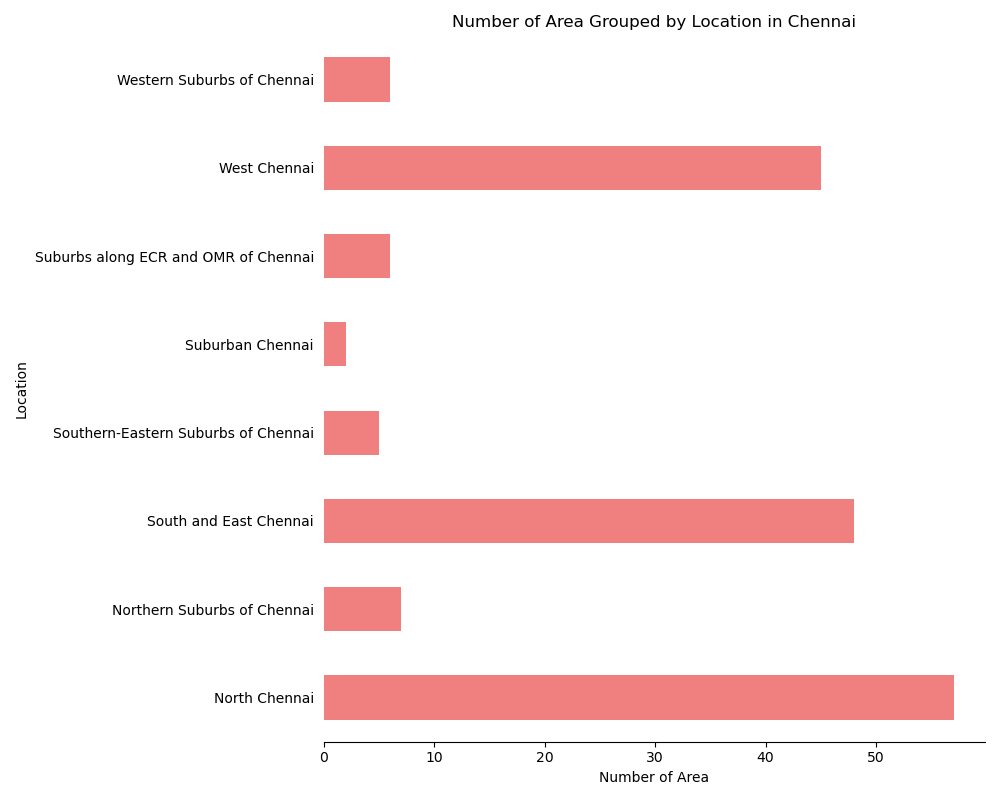

In [50]:
fig = plt.figure(figsize=(10,8))

ax = Area_Chennai.plot(kind='barh', color='lightcoral')
ax.set_title('Number of Area Grouped by Location in Chennai', fontsize=12)
ax.set_xlabel('Number of Area', fontsize=10)
ax.set_ylabel('Location', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

From the above grapgh. we can make a note that the most number of neighbourhoods are located in North Chennai, west Chennai and South and East Chennai. 

Using the lab folium to visualize the data of neighbourhood in Chennai.

In [15]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, Area in zip(df['Latitude'], df['Longitude'], df['Location'], df['Area']):
    label = '{}, {}'.format(Area, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

Using foursquare API to obtain venue recommendation.

In [16]:
CLIENT_ID = 'GIYGPPQFH5T2IEQ1K11UUPWXTOZDJOFCVN2WWMKYUJ2HXZ4I'
CLIENT_SECRET = 'OIG3UBGSOAP3C0OWARPQEWWRIPCG4FWY2TE2JV0LO53CSLAE'
ACCESS_TOKEN = 'DGNTSLXRWTNYC4M1SWIGNOURVGSRX20FEPMAIFDOS0C5CKRY'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GIYGPPQFH5T2IEQ1K11UUPWXTOZDJOFCVN2WWMKYUJ2HXZ4I
CLIENT_SECRET:OIG3UBGSOAP3C0OWARPQEWWRIPCG4FWY2TE2JV0LO53CSLAE


In [17]:
Area_name = df.loc[0, 'Area']
Area_lat = df.loc[0, 'Latitude']
Area_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(Area_name,
                                                                                                        Area_lat, Area_long))

The neighborhood is Adambakkam and it's geographical coordinates are 12.99192000000005 latitude and 80.20603000000006 longitude


In [18]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Area_lat, 
   Area_long, 
    radius, 
    LIMIT)

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '615c050f78879d7e079ccfa1'},
 'response': {'headerLocation': 'Velachery',
  'headerFullLocation': 'Velachery, Chennai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 13.000920009000058,
    'lng': 80.21524920008119},
   'sw': {'lat': 12.982919991000042, 'lng': 80.19681079991892}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5155ca10e4b0cc3dad2cf381',
       'name': 'Pizza Republic',
       'location': {'address': 'VIHAS Restaurant',
        'crossStreet': '195/5 Medavakkam Main Road, Adambakkam',
        'lat': 12.99098677891081,
        'lng': 80.19861315843515,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.99098677891081,
          'lng': 80.198613158

In [20]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-21-dc733077f29a>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Pizza Republic,Pizza Place,12.990987,80.198613
1,St Thomas Mount Railway Station,Train Station,12.994987,80.200302
2,Sukkkubai Beef Biryani Shop,Indian Restaurant,12.998769,80.201381
3,Loiee,Bakery,12.992197,80.199000
4,Venkateshwara Super Market,Department Store,12.986320,80.205168


In [22]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), Area_name))

9 venues were returned for Adambakkam by Foursquare


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


We can apply the function created to get nearby venues for all neighborhoods in Mumbai. We will get 200 nearby venues within a 1km radius, same as before.



In [24]:
Chennai_venues = getNearbyVenues(names=df['Area'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)


Adambakkam
Adyar
Alandur
Alapakkam
Alwarthirunagar
Ambattur
Aminjikarai
Anna Nagar
Annanur
Arumbakkam
Ashok Nagar
Avadi
Ayappakkam
Basin Bridge
Besant Nagar
Broadway
Central
Chetpet
Choolai
MMDA Colony
Defence Colony
Egmore
Ennore
Erukanchery
George Town
Gerugambakkam
Gopalapuram
Guindy
Hastinapuram
ICF Colony
Injambakkam
Irumbuliyur
Iyyapanthangal
Jamalia
K.K. Nagar
Kadaperi
Kallikuppam
Karambakkam
Kathirvedu
Kathivakkam
Keelkattalai
Kodungaiyur
Kolappakkam
Kolathur
Korattur
Korukkupet
Kosapet
Kottivakkam
Kovilambakkam
Koyambedu
Kundrathur
Lakshmipuram
M.G.R. Garden
M.G.R. Nagar
M.K.B. Nagar
Madhavaram
Madhavaram Milk Colony
Madipakkam
Maduravoyal
Mambakkam
Manali
Manali New Town
manapakkam
Mangadu
Manjambakkam
Mannadi
Mathur MMDA
Medavakkam
Minjur
Mogappair
Moolakadai
Mowlivakkam
Mudichur
Mugalivakkam
Mylapore
Nagalkeni
Nandambakkam
Nanganallur
Naravarikuppam
Neelankarai
Nerkundrum
Nesapakkam
New Washermenpet
Nolambur
Old Washermenpet
Oragadam
Otteri
Padi
Palavakkam
Pallavaram
Pallik

In [25]:
print(Chennai_venues.shape)
Chennai_venues.head(10)

(1990, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Pizza Republic,12.990987,80.198613,Pizza Place
1,Adambakkam,12.99192,80.20603,St Thomas Mount Railway Station,12.994987,80.200302,Train Station
2,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
3,Adambakkam,12.99192,80.20603,Loiee,12.992197,80.199000,Bakery
4,Adambakkam,12.99192,80.20603,Venkateshwara Super Market,12.986320,80.205168,Department Store
5,Adambakkam,12.99192,80.20603,Deepam Restaurant,12.985380,80.205281,Indian Restaurant
6,Adambakkam,12.99192,80.20603,Design Hotel Chennai by jüSTa,12.992068,80.214965,Hotel
7,Adambakkam,12.99192,80.20603,St. Thomas Mount Metro Station,12.994772,80.197556,Metro Station
8,Adambakkam,12.99192,80.20603,Heritage Fresh,13.000499,80.208087,Supermarket
9,Adyar,13.00304,80.25187,Domino's Pizza,13.002000,80.254000,Pizza Place


In [26]:
Chennai_venues.groupby('Area', as_index=False).count()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,9,9,9,9,9,9
1,Adyar,67,67,67,67,67,67
2,Alandur,16,16,16,16,16,16
3,Alapakkam,8,8,8,8,8,8
4,Alwarthirunagar,14,14,14,14,14,14
...,...,...,...,...,...,...,...
158,Villivakkam,5,5,5,5,5,5
159,Virugambakkam,6,6,6,6,6,6
160,Vyasarpadi,3,3,3,3,3,3
161,West Mambalam,19,19,19,19,19,19


In [27]:
print("There are {} unique categories".format(Chennai_venues['Venue Category'].nunique()))

There are 196 unique categories


Analyzing each neighourhood using One-hot encoding to see which categories belong to which area.

In [28]:
Chennai_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")
Chennai_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,...,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Chennai_onehot['Area'] = Chennai_venues['Area']
Chennai_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,Arcade,...,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store,Area
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adambakkam
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Adambakkam
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adambakkam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adambakkam
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adambakkam


In [30]:
temp = list(Chennai_onehot.columns)

if 'Area' in temp:
    temp.remove('Area')
    
fixed_columns = ['Area'] + temp
Chennai_onehot = Chennai_onehot[fixed_columns]

Chennai_onehot.head()

,Area,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,...,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Chennai_grouped = Chennai_onehot.groupby('Area', sort=False).mean().reset_index()
print(Chennai_grouped.shape)
Chennai_grouped.head(10)

(163, 197)


,Area,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,...,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.014925,0.0,0.0,0.0,0.014925
2,Alandur,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.062500,0.000000,0.0,0.0,0.0,0.000000
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,Alwarthirunagar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000
5,Ambattur,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
6,Aminjikarai,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
7,Anna Nagar,0.0,0.0,0.0,0.0,0.0,0.014286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.042857,0.0,0.0,0.0,0.000000
8,Annanur,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000
9,Arumbakkam,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.125000,0.0,0.0,0.0,0.000000


In [32]:
num_top_venues = 5

for hood in Chennai_grouped['Area']:
    print("----"+hood+"----")
    temp = Chennai_grouped[Chennai_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adambakkam----
               venue  freq
0  Indian Restaurant  0.22
1        Pizza Place  0.11
2             Bakery  0.11
3      Train Station  0.11
4   Department Store  0.11


----Adyar----
                  venue  freq
0     Indian Restaurant  0.22
1                  Café  0.06
2           Pizza Place  0.04
3  Fast Food Restaurant  0.04
4      Asian Restaurant  0.04


----Alandur----
               venue  freq
0  Indian Restaurant  0.19
1             Bakery  0.12
2      Metro Station  0.12
3              Hotel  0.12
4       Burger Joint  0.06


----Alapakkam----
                  venue  freq
0  Fast Food Restaurant  0.25
1      Department Store  0.25
2        Clothing Store  0.12
3      Asian Restaurant  0.12
4  Chettinad Restaurant  0.12


----Alwarthirunagar----
                  venue  freq
0        Clothing Store  0.14
1  Fast Food Restaurant  0.14
2    Chinese Restaurant  0.07
3            Smoke Shop  0.07
4           Pizza Place  0.07


----Ambattur----
               ven

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Chennai_grouped['Area']

for ind in np.arange(Chennai_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_grouped.iloc[ind, :], num_top_venues)

Area_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Indian Restaurant,Train Station,Bakery,Supermarket,Department Store,Metro Station,Hotel,Pizza Place,Farm,Food & Drink Shop
1,Adyar,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,North Indian Restaurant,South Indian Restaurant,Electronics Store
2,Alandur,Indian Restaurant,Bakery,Hotel,Metro Station,Hotel Bar,Fish Market,Church,Café,Burger Joint,Pizza Place
3,Alapakkam,Department Store,Fast Food Restaurant,Clothing Store,Chettinad Restaurant,Sandwich Place,Asian Restaurant,Women's Store,Event Space,Food & Drink Shop,Food
4,Alwarthirunagar,Fast Food Restaurant,Clothing Store,Indian Restaurant,Smoke Shop,Gym,Movie Theater,Pizza Place,Chinese Restaurant,Chettinad Restaurant,Café
...,...,...,...,...,...,...,...,...,...,...,...
158,Kanathur,Café,Whisky Bar,Movie Theater,Juice Bar,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
159,Muthukadu,Indian Restaurant,Coffee Shop,Hotel,Theme Park,Museum,Event Space,Food & Drink Shop,Food,Flower Shop,Flea Market
160,Kelambakkam,Indian Restaurant,Tea Room,Café,Bus Station,South Indian Restaurant,Coffee Shop,American Restaurant,Farm,Food Service,Food Court
161,Kovalam,Indian Restaurant,Resort,Seafood Restaurant,Hotel,Beach,Bar,Café,Restaurant,Surf Spot,Flower Shop


### Now Clustering Neighbourhood to analyze the data better

In [36]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [37]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = Chennai_grouped.drop('Area', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=30).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.2621230728700257, 0.07206564863924596, 0.08608278007050174, 0.06943675497735557, 0.08107177881592263, 0.0809379744075256, 0.10068842769208816, 0.10266332512125173, 0.10471471296391847, 0.09677706466454976, 0.09570169822181546, 0.09192340029664618, 0.1107142039963006, 0.13052580101726724]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<IPython.core.display.Javascript object>


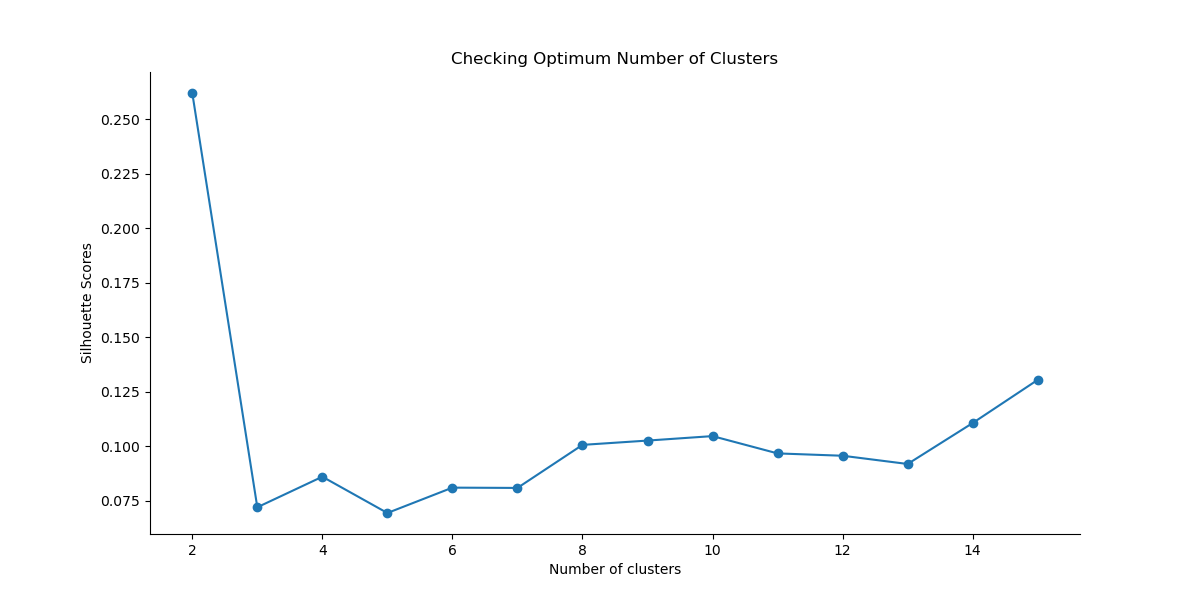

In [64]:
print(scores)
print(kval)
plot(kval, scores)

Even when the number of clusters grows, we can see that the silhouette scores remain low. This suggests that over a wide range of k-values, the inter-cluster distance between various clusters is not very large. We shall, however, make every effort to cluster our data. Well pick 3 clusters for our clustering model because it gives us the best silhouette score 

In [98]:
k = 3

Chennai_clustering = Chennai_grouped.drop('Area', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(Chennai_clustering) #Can choose any random_state

kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 2], dtype=int32)

In [100]:
print(Chennai_merged.shape)
Chennai_merged
Chennai_merged.dropna() 

(176, 15)


,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9919,80.206,0.0,Indian Restaurant,Train Station,Bakery,Supermarket,Department Store,Metro Station,Hotel,Pizza Place,Farm,Food & Drink Shop
1,Adyar,South and East Chennai,13.003,80.2519,1.0,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,North Indian Restaurant,South Indian Restaurant,Electronics Store
2,Alandur,South and East Chennai,13.0001,80.2006,0.0,Indian Restaurant,Bakery,Hotel,Metro Station,Hotel Bar,Fish Market,Church,Café,Burger Joint,Pizza Place
3,Alapakkam,West Chennai,13.0461,80.165,0.0,Department Store,Fast Food Restaurant,Clothing Store,Chettinad Restaurant,Sandwich Place,Asian Restaurant,Women's Store,Event Space,Food & Drink Shop,Food
4,Alwarthirunagar,West Chennai,13.0506,80.184,0.0,Fast Food Restaurant,Clothing Store,Indian Restaurant,Smoke Shop,Gym,Movie Theater,Pizza Place,Chinese Restaurant,Chettinad Restaurant,Café
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Kanathur,Suburbs along ECR and OMR of Chennai,12.8472,80.2414,0.0,Café,Whisky Bar,Movie Theater,Juice Bar,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
172,Muthukadu,Suburbs along ECR and OMR of Chennai,12.8317,80.2421,1.0,Indian Restaurant,Coffee Shop,Hotel,Theme Park,Museum,Event Space,Food & Drink Shop,Food,Flower Shop,Flea Market
173,Kelambakkam,Suburbs along ECR and OMR of Chennai,12.7861,80.2203,1.0,Indian Restaurant,Tea Room,Café,Bus Station,South Indian Restaurant,Coffee Shop,American Restaurant,Farm,Food Service,Food Court
174,Kovalam,Suburbs along ECR and OMR of Chennai,12.7899,80.2504,0.0,Indian Restaurant,Resort,Seafood Restaurant,Hotel,Beach,Bar,Café,Restaurant,Surf Spot,Flower Shop


In [101]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Chennai_merged['Latitude'], Chennai_merged['Longitude'], Chennai_merged['Area'], Chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

## Cluster 1

In [102]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 0,Chennai_merged.columns[[0] + [1] + list(range(5, Chennai_merged.shape[1]))]]


,Area,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,Indian Restaurant,Train Station,Bakery,Supermarket,Department Store,Metro Station,Hotel,Pizza Place,Farm,Food & Drink Shop
2,Alandur,South and East Chennai,Indian Restaurant,Bakery,Hotel,Metro Station,Hotel Bar,Fish Market,Church,Café,Burger Joint,Pizza Place
3,Alapakkam,West Chennai,Department Store,Fast Food Restaurant,Clothing Store,Chettinad Restaurant,Sandwich Place,Asian Restaurant,Women's Store,Event Space,Food & Drink Shop,Food
4,Alwarthirunagar,West Chennai,Fast Food Restaurant,Clothing Store,Indian Restaurant,Smoke Shop,Gym,Movie Theater,Pizza Place,Chinese Restaurant,Chettinad Restaurant,Café
5,Ambattur,West Chennai,Ice Cream Shop,Movie Theater,Asian Restaurant,Men's Store,Flea Market,Multiplex,Department Store,River,Indian Restaurant,Antique Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
165,Chembarambakkam,Southern-Eastern Suburbs of Chennai,Indian Restaurant,South Indian Restaurant,Fast Food Restaurant,Café,Snack Place,Coffee Shop,American Restaurant,Farm,Food Service,Food Court
167,Maraimalai nagar,Southern-Eastern Suburbs of Chennai,Gaming Cafe,Bakery,Women's Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
169,Guduvanchery,Southern-Eastern Suburbs of Chennai,Bakery,Indian Restaurant,Indie Movie Theater,Hotel,Train Station,North Indian Restaurant,Event Space,Food & Drink Shop,Food,Flower Shop
171,Kanathur,Suburbs along ECR and OMR of Chennai,Café,Whisky Bar,Movie Theater,Juice Bar,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant


## Cluster 2

In [103]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 1, Chennai_merged.columns[[0] + [1] + list(range(5, Chennai_merged.shape[1]))]]

,Area,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Adyar,South and East Chennai,Indian Restaurant,Café,Pizza Place,Asian Restaurant,Ice Cream Shop,Fast Food Restaurant,Dessert Shop,North Indian Restaurant,South Indian Restaurant,Electronics Store
15,Broadway,North Chennai,Indian Restaurant,Restaurant,Video Store,Market,Harbor / Marina,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
17,Chetpet,South and East Chennai,Indian Restaurant,Café,Coffee Shop,Chinese Restaurant,Hotel,Seafood Restaurant,Bakery,Juice Bar,Sandwich Place,Fast Food Restaurant
18,Choolai,North Chennai,Indian Restaurant,Department Store,Platform,Soccer Stadium,Hotel,Donut Shop,Food,Flower Shop,Flea Market,Fish Market
26,Gopalapuram,South and East Chennai,Indian Restaurant,Hotel,Café,Ice Cream Shop,Restaurant,Pizza Place,Concert Hall,Tea Room,Bar,American Restaurant
35,Kadaperi,South and East Chennai,Indian Restaurant,Platform,Train Station,Jewelry Store,Light Rail Station,Electronics Store,Food & Drink Shop,Food,Flower Shop,Flea Market
43,Kolathur,North Chennai,Indian Restaurant,Astrologer,Bus Stop,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
46,Kosapet,North Chennai,Indian Restaurant,Hotel,Department Store,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
48,Kovilambakkam,South and East Chennai,Indian Restaurant,Fried Chicken Joint,Bar,ATM,Vegetarian / Vegan Restaurant,Train Station,Food & Drink Shop,Food,Flower Shop,Flea Market
57,Madipakkam,South and East Chennai,Indian Restaurant,Convenience Store,Department Store,Grocery Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market


## Cluster 3

In [104]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 2, Chennai_merged.columns[[0] + [1] + list(range(5, Chennai_merged.shape[1]))]]

,Area,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,MMDA Colony,West Chennai,ATM,Bike Rental / Bike Share,IT Services,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
22,Ennore,North Chennai,ATM,Train Station,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
41,Kodungaiyur,North Chennai,ATM,Coffee Shop,Bank,Health & Beauty Service,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
60,Manali,North Chennai,ATM,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
61,Manali New Town,North Chennai,ATM,Bike Rental / Bike Share,IT Services,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
66,Mathur MMDA,North Chennai,ATM,Pharmacy,Electronics Store,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
68,Minjur,North Chennai,ATM,Train Station,Paper / Office Supplies Store,Scenic Lookout,Electronics Store,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
72,Mudichur,South and East Chennai,ATM,Supermarket,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
110,Puzhal,North Chennai,ATM,Gym,Food Truck,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market
121,Surapet,North Chennai,ATM,Food & Drink Shop,Food Truck,Food Court,Food,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


### Results and Discussion:

In cluster 3, the  1st most common venue is ATM and even the 2nd most and 3rd most common venues are train station, electronic store. Hence cluster 2 is recommended based on the most common venues in the cluster 3. Clsuter 3 has higher number of other venues such as ATM, Electronic store, train station, fish market, flea market. Hence opening a rstaurant in an area where there is none will be a good strategy, however the suitability of location interms of customer footfall and likeabliity of the cluster should also be kept in mind. The variables have not been included in the study becuase of the limited scope of the study conducted. 
When we look at cluster 1 and clsuter 2, we can see that the most common venues in these cluster is Indian restaurant,bakery, cafe, fast food restaurant, whiskey bar. Hence coming up with a different format of cuisine or concept for a restaurant which serves a unique concept in the locality to start out a restaurant business.  


In [96]:
new_restaurant_neighborhoods = Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 0, Chennai_merged.columns[[0, 1, 2,3] + list(range(5, Chennai_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,Area,Location,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9919,80.206,Indian Restaurant,Train Station,Bakery,Supermarket,Department Store,Metro Station,Hotel,Pizza Place,Farm,Food & Drink Shop
2,Alandur,South and East Chennai,13.0001,80.2006,Indian Restaurant,Bakery,Hotel,Metro Station,Hotel Bar,Fish Market,Church,Café,Burger Joint,Pizza Place
3,Alapakkam,West Chennai,13.0461,80.165,Department Store,Fast Food Restaurant,Clothing Store,Chettinad Restaurant,Sandwich Place,Asian Restaurant,Women's Store,Event Space,Food & Drink Shop,Food
4,Alwarthirunagar,West Chennai,13.0506,80.184,Fast Food Restaurant,Clothing Store,Indian Restaurant,Smoke Shop,Gym,Movie Theater,Pizza Place,Chinese Restaurant,Chettinad Restaurant,Café
5,Ambattur,West Chennai,13.1188,80.1548,Ice Cream Shop,Movie Theater,Asian Restaurant,Men's Store,Flea Market,Multiplex,Department Store,River,Indian Restaurant,Antique Shop


In [97]:
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, Area in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Area']):
    label = '{}, {}'.format(Area, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), ).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations

### Conclusion: 
We successfully researched the neighbourhoods in Mumbai, India to determine which areas would be the greatest for a new restaurant to open. Cluster 1 communities are suggested as potential locations for the new restaurant based on our research. This is also depicted in the above map. Stakeholders and investors can fine-tune this by factoring in additional elements such as transportation, legal constraints, and associated expenses. These were not evaluated since they were outside the scope of this project.
